In [8]:
!pip3 install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
import os
import json
import pandas as pd
import networkx as nx
import scipy

# Project 1: Nike

On Facebook, business pages can "like" other pages, and a directed network could be derived from this liking relationship. Jane collected all the pages liked by Nike and the linking relationships among these pages. This results in two datesets:
- facebook_node_attributes.csv
- facebook_data.csv

The first dataset includes page attributes and the second data contains the edgelist information. We will visualize and explore how centrality attributes, together with other node-level attributes, could be used for spokeperson selection.




## Problem 1.1
Generate a subgraph with nodes that have more than 80,000,000 fan count. Visualize this network with node labels and upload the network graph. Make sure to use kamada_kawai_layout as the layout algorithm.

Tips: You can visualize the whole network first and then generate the subgragh.

Expected output:
- code
- gragh

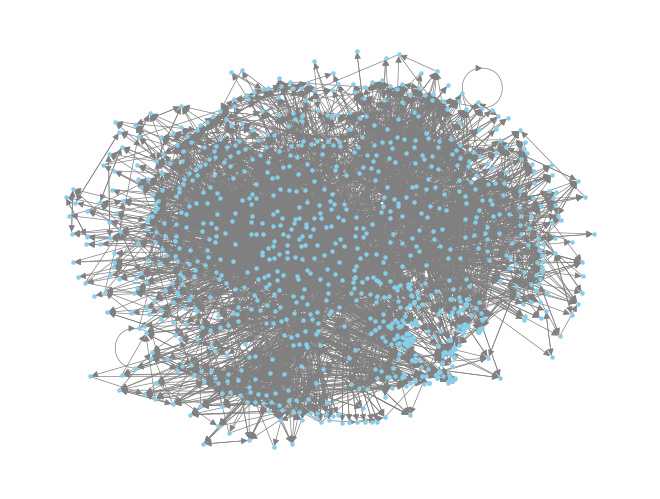

In [4]:
edgelist=pd.read_csv('facebook_data.csv')
G=nx.from_pandas_edgelist(
 edgelist,source="username1",target="username2",
                            create_using=nx.DiGraph()

) # No need to add create_using=nx.DiGraph() if it is an undirected graph

nx.draw(G, with_labels=False, node_size=5,node_color='skyblue',width=0.5, edge_color='gray',pos= nx.kamada_kawai_layout(G))


In [5]:
# Calculate eigenvector centrality
eigenvector_centrality =  nx.eigenvector_centrality(G)
# Calculate in-degree centrality
in_degree_centrality =   nx.in_degree_centrality(G)
# Calculate out-degree centrality
out_degree_centrality =   nx.out_degree_centrality(G)
# Calculate betweenness centrality
betweenness_centrality =   nx.betweenness_centrality(G)
# Calculate closeness centrality
closeness_centrality =   nx.closeness_centrality(G)
# Save node attributes.
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')
nx.set_node_attributes(G, in_degree_centrality, 'in_degree_centrality')
nx.set_node_attributes(G, out_degree_centrality, 'out_degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')



In [6]:
node_attribute=pd.read_csv('facebook_node_attributes.csv')
node_attribute

,Unnamed: 0,name,username,label,category,post_activity,fan_count,talking_about_count,users_can_post
0,695,1.240000e+14,1brianroberts,Brian Roberts,Athlete,0.00,5601,0,no
1,1087,4.000000e+14,22RudyGay,Rudy Gay,Athlete,0.00,375770,131,no
2,634,1.337282e+10,23andMe,23andMe,Product/Service,0.29,452384,9030,yes
3,587,1.270000e+14,3DSkateboards,3d Skateboards,Product/Service,0.00,22625,12,yes
4,943,1.680000e+14,3GerardPique,Gerard Piqué,Athlete,0.01,18913264,9758,yes
...,...,...,...,...,...,...,...,...,...
1018,491,7.444336e+10,YuriFans,Yuri Foreman,Athlete,0.00,7718,3,yes
1019,153,3.020000e+14,ZELARestaurants,ZELA Restaurants,Restaurant,0.02,5698,182,yes
1020,499,2.040000e+14,ZipsMBB,Akron Zips Men's Basketball,School Sports Team,0.01,7579,38,yes
1021,197,1.990000e+14,ZlatanIbrahimovic,Zlatan Ibrahimović,Athlete,0.02,26501562,148646,no


In [7]:


for index, row in node_attribute.iterrows():
    node_id = row['username']
    attributes = row.to_dict()  # Convert row to dictionary excluding node_id
    nx.set_node_attributes(G, {node_id: attributes})
    ## Complete the code to add external node attributes to the network

In [8]:
attributes_list=[]
for node, attributes in G.nodes(data=True):
    attributes_list.append(attributes)

attributes_df=pd.DataFrame(attributes_list)
attributes_df

,eigenvector_centrality,in_degree_centrality,out_degree_centrality,betweenness_centrality,closeness_centrality,Unnamed: 0,name,username,label,category,post_activity,fan_count,talking_about_count,users_can_post
0,0.001669,0.000978,0.001957,0.000003,0.169344,141,1.554766e+10,supergoop,Supergoop,Health/Beauty,0.03,50795,657,no
1,0.028281,0.013699,0.000000,0.000000,0.211438,738,5.550297e+09,cnn,CNN,Media/News Company,1.96,30792744,1993068,no
2,0.010722,0.004892,0.031311,0.000528,0.187514,399,3.180000e+14,DPWorldTourChampionship,DP World Tour Championship,Sports Event,0.04,10163,53,yes
3,0.014725,0.001957,0.018591,0.002773,0.205282,527,1.632542e+10,LangLangPiano,Lang Lang - 郎朗,Musician/Band,0.03,496794,2745,yes
4,0.047784,0.004892,0.017613,0.001666,0.206739,1077,4.310000e+14,royhibbert,Roy Hibbert,Athlete,0.00,406115,93,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.012975,0.000978,0.000000,0.000000,0.182670,1019,1.770000e+15,PaulMillsapOfficial,Paul Millsap,Athlete,0.00,200045,27,yes
1019,0.004910,0.000978,0.000000,0.000000,0.182670,562,1.810000e+15,TGRLiveEvents,TGRLiveEvents,Company,0.02,1379,3397,yes
1020,0.018469,0.004892,0.000000,0.000000,0.196165,106,1.860000e+15,RayAllen,Ray Allen,Athlete,0.01,4882675,1933,no
1021,0.005256,0.001957,0.000000,0.000000,0.183105,564,2.020000e+15,tgrdesignbytw,TGR Design,Product/Service,0.00,1342,392,no


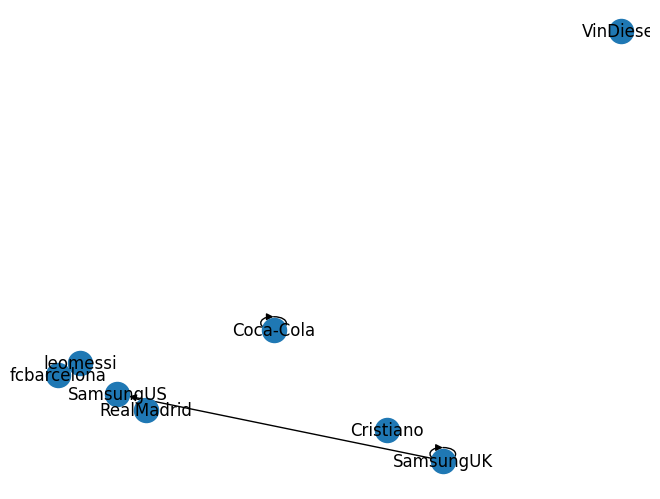

In [9]:
selected_nodes = []
for node, data in G.nodes(data=True):
    if data.get("fan_count") >80000000:
        selected_nodes.append(node)

subgraph =G.subgraph(selected_nodes)
pos = nx.spring_layout(G)
nx.draw(
   subgraph, pos, with_labels=True
)


## Problem 1.2
For this subgraph, generate a dataframe to save all attributes of the nodes. Copy the code here. Then, using network centrality measures as support to discuss who Nike should hire as spokesperson if Nike focuses not only on fan count but also network centrality.

Tip: use sort_values(by= "columname", ascending=False) to identify nodes with high centrality measures.

Expected output:
- Code
- Propose 3 spokespeople for Nike. For each spokesperson, discuss their centrality and why you proposed them. Demonstrate your knowledge about different centrality measures in the discussion.

In [11]:
attributes_list=[]
for node, attributes in subgraph.nodes(data=True):
    attributes_list.append(attributes)
attributes_df=pd.DataFrame(attributes_list)
attributes_df

,eigenvector_centrality,in_degree_centrality,out_degree_centrality,betweenness_centrality,closeness_centrality,Unnamed: 0,name,username,label,category,post_activity,fan_count,talking_about_count,users_can_post
0,0.005604,0.003914,0.004892,0.000750,0.185787,234,1.270000e+14,SamsungUK,Samsung,Computer Company,0.22,159992225,12253,yes
1,0.063196,0.038160,0.025440,0.033012,0.253648,10,8.122120e+10,Cristiano,Cristiano Ronaldo,Athlete,0.03,122672469,688102,no
2,0.055038,0.021526,0.002935,0.001552,0.230255,193,1.760000e+14,leomessi,Leo Messi,Athlete,0.01,89957459,680636,no
3,0.006623,0.003914,0.000000,0.000000,0.185834,480,8.956227e+10,VinDiesel,Vin Diesel,Artist,0.01,99132429,47288,no
4,0.015486,0.003914,0.004892,0.002450,0.205604,555,7.224957e+09,SamsungUS,Samsung,Electronics Company,0.43,159997828,87893,yes
5,0.058345,0.027397,0.008806,0.008449,0.231474,748,1.970000e+11,fcbarcelona,FC Barcelona,Sports Team,0.21,102653035,924723,no
6,0.024105,0.012720,0.002935,0.000804,0.208797,170,1.903472e+10,RealMadrid,Real Madrid C.F.,Sports Team,0.09,109425487,904634,no
7,0.045919,0.029354,0.002935,0.007554,0.238856,413,4.079631e+10,Coca-Cola,Coca-Cola,Food & Beverage,0.00,107873884,7025,yes


## Problem 1.3

For the whole network (no filtering), perform community detection and plot the network by allowing nodes in different communities to be colored differently. Please note that community detection is only applicable to undirected network, and you will need to use ```G = G.to_undirected()``` to turn the network to an undirected network before you perform community detection.

Expected output:
- Code.
- A network gragh to show communities (no labels are needed for nodes).

Tip: remove nx.draw_networkx_labels(G, pos, font_size=10) and reduce node size.

Detected 8 communities.


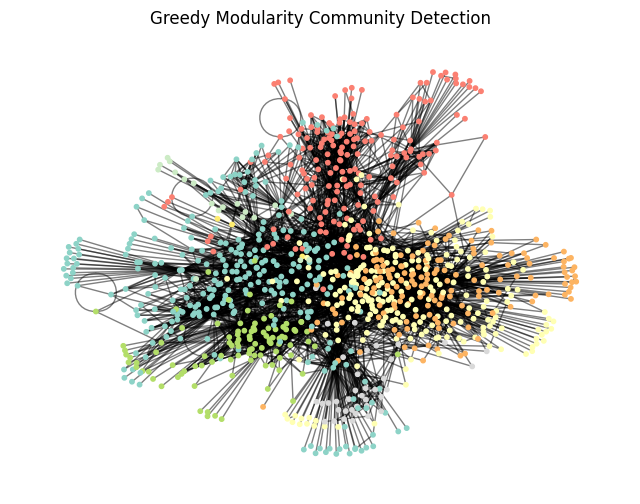

In [12]:
G = G.to_undirected()

from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

communities = greedy_modularity_communities(G)

# Display number of communities
print(f"Detected {len(communities)} communities.")

# Map each node to a community ID
node_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_community[node] = i
        G.nodes[node]['community'] = i

colors = []
for n in G.nodes():
    colors.append(node_community[n])

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.Set3, node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Greedy Modularity Community Detection")
plt.axis('off')
plt.show()

# Project 2: Bright Kite
Brightkite was a location-based social networking website. Users were able to "check in" at places by using text messaging or one of the mobile applications and they were able to see who is nearby and who has been there before. The source of the data is [here](https://snap.stanford.edu/data/loc-brightkite.html).

## Problem 2.1 
Generate a network using connections on BrightKite and display the network. Note that this is an undirected network and we need to remove ```create_using=nx.DiGraph()``` when generating this network. Upload your network graph below.

Expected Output:
- Code
- Network Plot

In [13]:
edgelist=pd.read_csv('brightkite_edgelist.csv')
edgelist

,node1,node2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
1575,121,61
1576,121,82
1577,121,88
1578,121,120


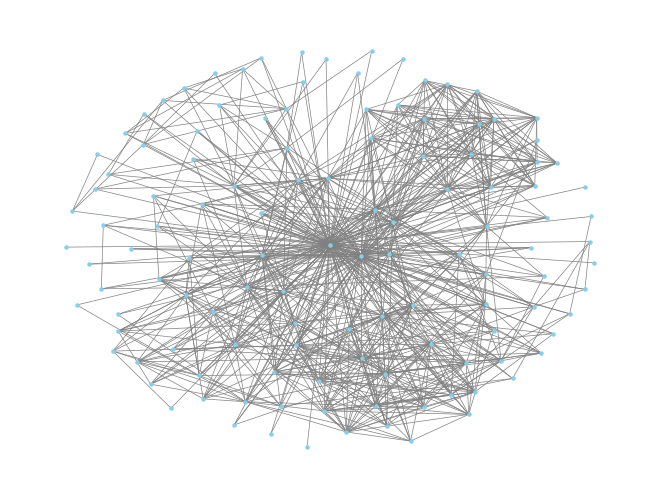

In [20]:
G=nx.from_pandas_edgelist(edgelist,source="node1",target="node2"
    #complete the code
                            ) # No need to add create_using=nx.DiGraph() if it is an undirected graph

nx.draw(G, with_labels=False, node_size=5,node_color='skyblue',width=0.5, edge_color='gray',pos= nx.kamada_kawai_layout(G))

## Problem 2.2
Generate centrality measures and add these network attributes to the network. Note that for undirected network, in-degree and out-degree are the same. We generate degree centrality by using ```degree_centrality = nx.degree_centrality(G)```. 

Then, import brightkite_checkins.csv and add external attributes of "checkins" to the network as a new network attribute. We further include node name as an additional feature by using the following code:
```
for node in G.nodes():
    G.nodes[node]['name'] = node
```
Finally, save all node-level attributes into a dataframe and print this dataframe. 

Expected output:
- Code
- Answer this question: how many nodes are there in this network?


In [21]:
degree_centrality = nx.degree_centrality(G)
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')
 

Import the checkin data

In [16]:
node_attribute=pd.read_csv("brightkite_checkins.csv")

for index, row in node_attribute.iterrows():
    node_id = int(row['node'])
    attributes = row.drop(['node']).to_dict()  # Convert row to dictionary excluding node_id
    nx.set_node_attributes(G, {node_id: attributes})

Save node attributes into a dataframe

In [17]:
attributes_list=[]
for node, attributes in G.nodes(data=True):
    attributes_list.append(attributes)

attributes_df=pd.DataFrame(attributes_list)
attributes_df

,eigenvector_centrality,degree_centrality,betweenness_centrality,closeness_centrality,checkins
0,0.365188,1.000000,0.610739,1.000000,2100
1,0.110019,0.166667,0.000833,0.545455,1210
2,0.084494,0.166667,0.007907,0.545455,2100
3,0.110094,0.158333,0.003335,0.542986,1807
4,0.089532,0.133333,0.000306,0.535714,779
...,...,...,...,...,...
116,0.040560,0.058333,0.000000,0.515021,43
117,0.017976,0.016667,0.000000,0.504202,2
118,0.031783,0.058333,0.000460,0.515021,7
119,0.046360,0.066667,0.000481,0.517241,4


## Problem 2.3
The platform wants to install a recommendation system to recommend friends. Which users are likely to be friends? Perform an edge prediction based on Jaccard similarity coefficient and print the top 20 edges. 

Expected Output:
- Code
- Top 20 edges

In [18]:
preds = nx.jaccard_coefficient(G)
 
import numpy as np

# Convert preds generator to a list of tuples
preds_list = list(preds)

# Convert to a NumPy array for sorting
preds_array = np.array(preds_list, dtype=object)
 
# Extract the similarity scores (column index 2)
scores = preds_array[:, 2]

# Get sorted indices in descending order
sorted_indices = np.argsort(-scores)

# Apply the sorted indices to the array
sorted_preds = preds_array[sorted_indices]

# Print top 100 predictions
for i in range(min(100, len(sorted_preds))):
    u, v, p = sorted_preds[i]
    print(f"({u}, {v}) -> {p:.4f}")

(73, 96) -> 1.0000
(73, 107) -> 1.0000
(111, 119) -> 1.0000
(96, 122) -> 1.0000
(73, 122) -> 1.0000
(107, 122) -> 1.0000
(89, 90) -> 1.0000
(96, 107) -> 1.0000
(1, 11) -> 0.9524
(63, 84) -> 0.7500
(57, 78) -> 0.7500
(19, 78) -> 0.7500
(56, 97) -> 0.7333
(93, 97) -> 0.7333
(39, 89) -> 0.6667
(39, 90) -> 0.6667
(78, 90) -> 0.6667
(62, 90) -> 0.6667
(62, 89) -> 0.6667
(78, 89) -> 0.6667
(84, 113) -> 0.6667
(84, 111) -> 0.6667
(84, 119) -> 0.6667
(55, 113) -> 0.6667
(54, 56) -> 0.6471
(4, 97) -> 0.6471
(26, 93) -> 0.6364
(38, 46) -> 0.6250
(28, 60) -> 0.6000
(19, 57) -> 0.6000
(32, 84) -> 0.6000
(86, 87) -> 0.5833
(4, 56) -> 0.5789
(23, 97) -> 0.5625
(17, 80) -> 0.5556
(38, 91) -> 0.5500
(87, 118) -> 0.5455
(1, 54) -> 0.5455
(31, 121) -> 0.5455
(38, 74) -> 0.5455
(54, 97) -> 0.5294
(5, 46) -> 0.5263
(38, 56) -> 0.5263
(3, 23) -> 0.5238
(5, 54) -> 0.5238
(36, 58) -> 0.5200
(48, 96) -> 0.5000
(48, 73) -> 0.5000
(96, 113) -> 0.5000
(81, 122) -> 0.5000
(23, 93) -> 0.5000
(32, 63) -> 0.5000
(59

## Problem 2.4 
Generate a subgraph for nodes with eigenvector centrality higher than 0.1. Plot the network and upload the network graph.
Expected output:
- code
- gragh

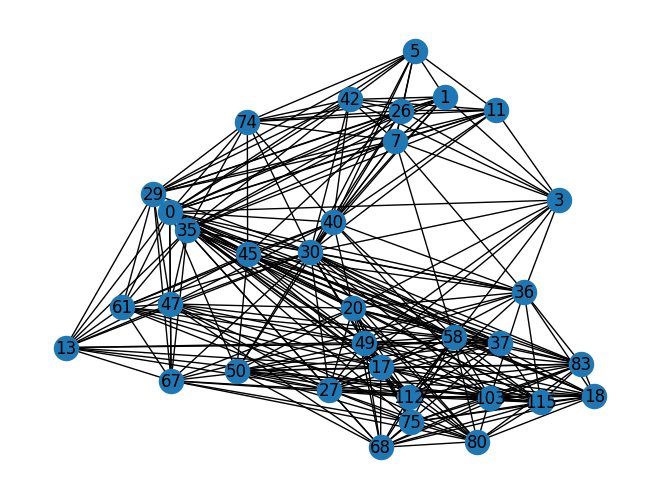

In [22]:
selected_nodes = []
for node, data in G.nodes(data=True):
    if data.get("eigenvector_centrality") > 0.1:
        selected_nodes.append(node)


pos = nx.spring_layout(G)
subgraph = G.subgraph(selected_nodes)
nx.draw(subgraph, pos, with_labels=True)

## Problem 2.5
Run a linear regression to explore how centrality measures affect the outcome of log(checkins+1). 
Expected output:
- code
- regression results
- interpretation

In [23]:
attributes_df.columns

Index(['eigenvector_centrality', 'degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'checkins'],
      dtype='object')

In [24]:
import pingouin as pg
x=attributes_df[['eigenvector_centrality','degree_centrality','betweenness_centrality','closeness_centrality']]

y=np.log1p(attributes_df['checkins'])
result = pg.linear_regression(x, y)

r2_value = result['r2'].iloc[0]
print(f"\nR² = {r2_value:.3f}")

 # Display the rounded result
result[['names', 'coef', 'pval']]


R² = 0.394


,names,coef,pval
0,Intercept,196.483628,0.003530
1,eigenvector_centrality,19.648270,0.207284
2,degree_centrality,110.485031,0.007353
3,betweenness_centrality,131.380022,0.006272
4,closeness_centrality,-386.478816,0.004154
